In [148]:
import numpy as np
import matplotlib.pyplot as plt

In [149]:
def function(x):
    return np.sin(x)

implementation of the atkin neville scheme

In [150]:
def aitken_neville(x,vals,x_bar):
    n = len(x)-1
    for m in range(1,n):
        for j in range(0,n-m):
            vals[j] = ((x_bar-x[j])*vals[j+1] - (x_bar-x[j+m])*vals[j])/(x[j+m]-x[j])
    return vals[0]

$$D$$ approximates the derivative of a function.

In [151]:
def D(x_, h):
    return (function(x_ + h) - function(x_)) / h

Compute the error between the approximated derivative and the real derivative. Since we can not compute
the derivative $$D$$ of $$f$$ (division by $$h = 0$$), we use small values of $$h$$ and approximate the derivative using the atkin neville scheme.
Then we can extrapolate the derivative by looking at $$h = 0$$.

In [152]:
def diff(q):
    x = np.pi
    n = 11
    err = []
    for k in range(1, n):
        h = [q**i for i in range(0,k)]
        f = [D(x,i) for i in h]
        res = aitken_neville(h, f, 0)
        e = np.cos(x)-res
        err.append(abs(e))
    return err

compute the errors for different values of $q$

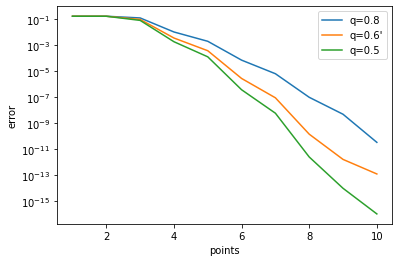

In [153]:
errors1 = diff(0.8)
errors2 = diff(0.6)
errors3 = diff(0.5)

plt.yscale("log")
plt.xlabel("points")
plt.ylabel("error")
plt.plot (range(1,len(errors1)+1), errors1, label="q=0.8")
plt.plot (range(1,len(errors2)+1), errors2, label="q=0.6'")
plt.plot (range(1,len(errors3)+1), errors3, label="q=0.5")
plt.legend()
plt.show()